In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

## Гамильтониан: 
$H=-\frac{\omega_q}{2}\sigma_z+{\Omega}cos(wt)\sigma_y$

## Настройка параметров задачи:


In [2]:
wq = 1.0  * 2 * np.pi  # частота кубита
Omega = 0.5  * 2 * np.pi  # сила связи
w=1.0  * 2 * np.pi # частота сигнала
tlist = np.linspace(0,5,300)

## Задание начального состояния, гамильтониана, операторов:

In [3]:
#начальное состояние
psi0 = basis(2,0)
# гамильтониан

def hamiltonian_t(t, args):
    H0 = args[0]
    H1 = args[1]
    
    return H0 + np.cos(w*t) * H1

H0 = -(wq/2) * sigmaz()
H1 = Omega * sigmay()
H = [H0, [H1, 't']]

## Решение:

In [4]:
output = mesolve(H, psi0, tlist,{},[sigmaz()])

##  Визуализация:

Text(0, 0.5, '$\\sigma_z$')

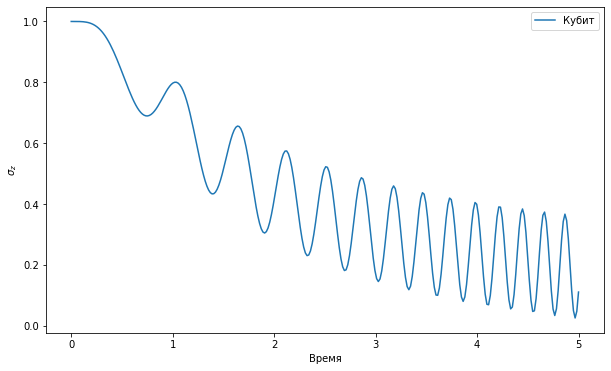

In [5]:
n_c = output.expect[0]

fig, axes = plt.subplots(1, 1, figsize=(10,6))

axes.plot(tlist, n_c, label="Кубит")

axes.legend(loc=0)
axes.set_xlabel('Время')
axes.set_ylabel('$\sigma_z$')